## Importing the libraries

In [ ]:
## The required libraries
import numpy as np
import pandas as pd
import plotly.express as px

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

palette = sns.color_palette("rainbow", 8)
%matplotlib inline

## Background and Context
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

## Feature Description
- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer
- CreditScore: It defines the credit history of the customer.
- Geography: A customer’s location
- Gender: It defines the Gender of the customer
- Age: Age of the customer
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 0=No ( Customer did not leave the bank ) 1=Yes ( Customer left the bank )

## Load the dataset

In [ ]:
## Lets import the dataset
df = pd.read_csv(r"C:\Users\user\Desktop\data\Bank_Chunk_Prediction_1\Data\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


## Understanding the dataset

In [ ]:
# I want to check the number of missing values from the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

#### Data Shape

In [ ]:
# I want to check the shape of the datset
df.shape

(10002, 14)

### Comment:
The dataset has 100002 rows with 14 attributes.

#### Check For unique Data

In [ ]:
# Lets get the unique count for each variables
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   73
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


##  Observation:
1. RowNumber looks like record tracking number and can be ignored. We have already considered the same as rownum variable in our dataframe and there is no need to handle the same.
2. CustomerID is unique appears to be unique to every customer and would not add any value in our analysis. We can drop the same.
3. Surname is a demographic information and doesn't really add value in identifying if the customer will continue with the bank.
4. Geography variable contains the name of the Country where customer resides / belongs to. This information can add value to analysis and identify if the Country has any influence on customer behavior. However we can do one hot encoding of the variable.
5. Exited is the target column and contains numerical data. We can use the same without any processing or handling.
6. All other variables look OK.

## Drop the RowNumber, CustomerID and Surname columns

In [ ]:
# Drop the column as explained above
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
# Lets review the numbers of row and see whats left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
# Check the variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Lets set some variables to object

df['NumOfProducts'] = df['NumOfProducts'].astype('object')
df['HasCrCard'] = df['HasCrCard'].astype('object')
df['IsActiveMember'] = df['IsActiveMember'].astype('object')
df['Tenure'] = df['Tenure'].astype('object')

## Lets divide the categorical and numerical variables

In [ ]:
# Lets first select the categorical variables
cat_var = [col for col in df.columns if df[col].dtypes == 'object']

# Lets select the numerical variables
num_var = df.select_dtypes(np.number).columns.to_list()[:-1]

# Null Values

In [ ]:
# Before we proceed , lets take care of the nan values
df.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# I want to replace the null values with the median of the distribution
# We will now fill it the null values
null_values = ['Geography', 'Age', 'HasCrCard', 'IsActiveMember']
for null in null_values:
    df[null].fillna(df[null].mode()[0], inplace = True)

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


# Explanatory Data Analysis

## Univariate Analysis

## Lets first see the proportion of the customer that Exited.

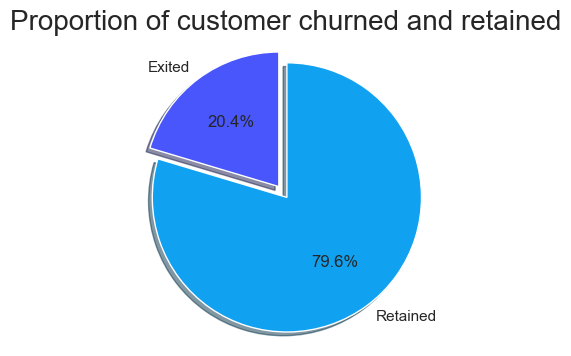

In [ ]:
labels = ['Exited', 'Retained']

sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

## Comment:
- The chart above shows that about about 20.4% of the customers have left the bank within the last 6 months, while 79.6% customers are still retained.
- This 20.4% Makes this dataset unbalaned
- So the baseline model could be to predict that 20.4% of the customers will churn. Given 20.4% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20.4% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

## Proportion Of Geography

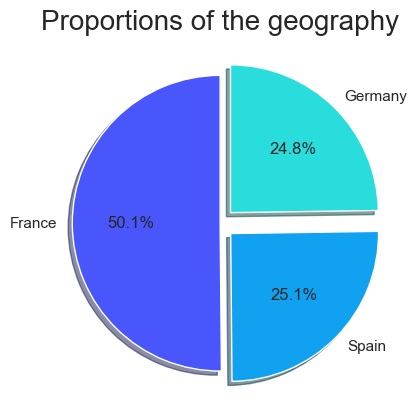

In [ ]:
# To check for the geography

# Lets the pie chart of the proportion
labels = ['France', 'Spain', 'Germany']
explode = (0, 0.1, 0.1)
plt.pie(df["Geography"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportions of the geography", size = 20)
plt.show()

## Observation:
Majority of customers are from France, about 50.1%, and about 24.8% from Germany and 25.1% from Spain.

## Gender

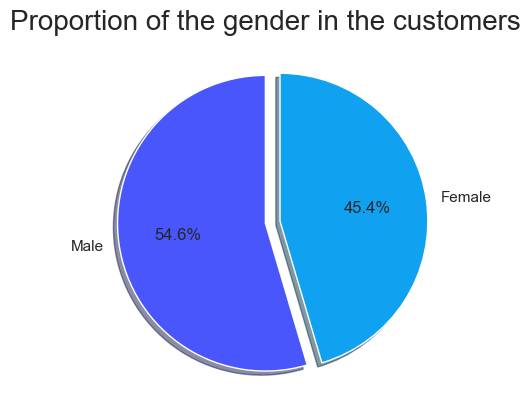

In [ ]:
# Lets the pie chart of the proportion
labels = ['Male', 'Female']
explode = (0, 0.1)
plt.pie(df.Gender.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportion of the gender in the customers", size = 20)
plt.show()

## Observation:
In our data sample there are more males than females.About 54.6% male and 45.4% Female

## Tenure

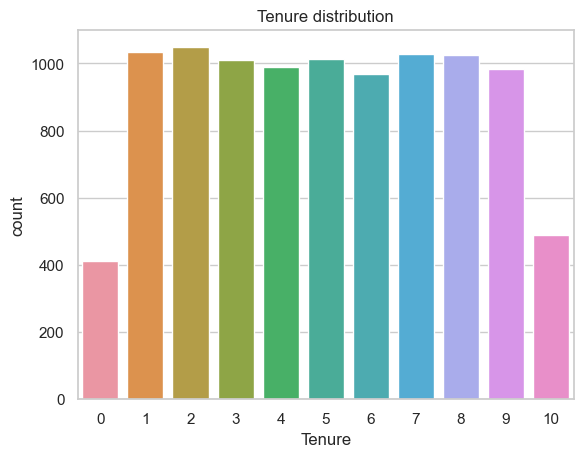

In [ ]:
sns.countplot(data = df, x = 'Tenure')
plt.title("Tenure distribution")
plt.show()

## Observations:
- Few records have tenure less than 1 year, this is possibly due to new customers.
- Data also shows that there are around 5% customers that are associated with Bank for 10 years or more.

In [ ]:
# # plt.pie(df['Tenure'].value_counts())

# labels = ['2 Years', '1 Year', '8 Years', '7 Years', '4 Years', '6 Years',
#           '3 Years', '10 Years', '3 Years', '9 Years', '0 Year']
# explode = (0.1, 0, 0.1, 0, 0.1, 0, 0, 0.1, 0, 0.1, 0)

# plt.figure(figsize = (8, 8))
# plt.pie(df['Tenure'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90, colors = palette)
# plt.title("Proportion of the gender in the customers", size = 10)
# plt.show()

## Age

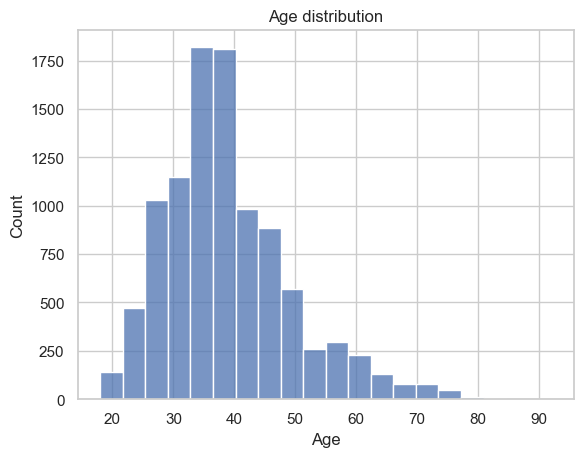

In [ ]:
sns.histplot(data = df, x = 'Age', bins = 20)
plt.title("Age distribution")
plt.show()

## Observation
1. Most Number of customer are around 30 to 39
2. Age shows a right tail, which means there are customers older than 60 years of age.
3. Considering the domain this data looks ok and be used as is.

## Credit Score

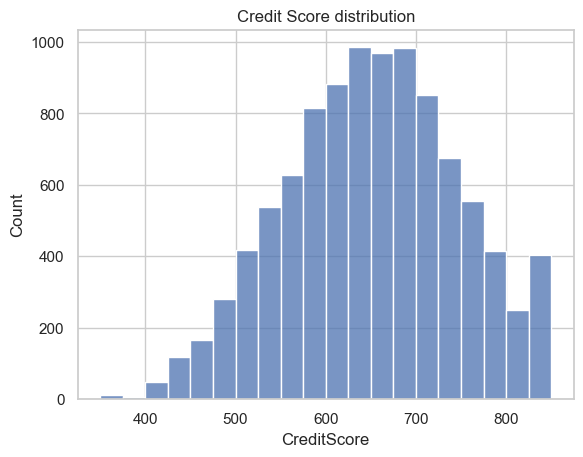

In [ ]:
sns.histplot(data = df, x = 'CreditScore', bins = 20)
plt.title("Credit Score distribution")
plt.show()

## Observations
- CreditScore shows a nearly normal distribution with few outliers on the left. This means some customers have less credit score.
- Considering the domain the data looks legitimate and can be used as is without outliers treatment.

## Is an Active member

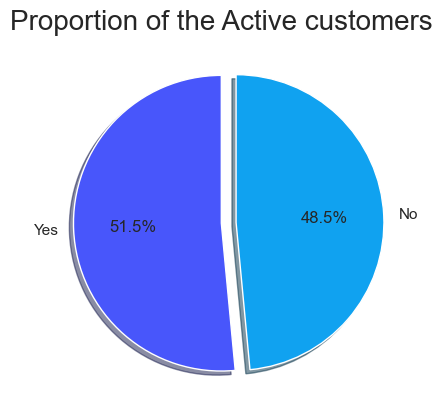

In [ ]:
# Lets the pie chart of the proportion
labels = ['Yes', 'No']
explode = (0, 0.1)
plt.pie(df.IsActiveMember.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportion of the Active customers", size = 20)
plt.show()

## Observations:

More than 50% customers are active and use bank products regularly

# Bivariate Analysis

<Axes: xlabel='IsActiveMember', ylabel='count'>

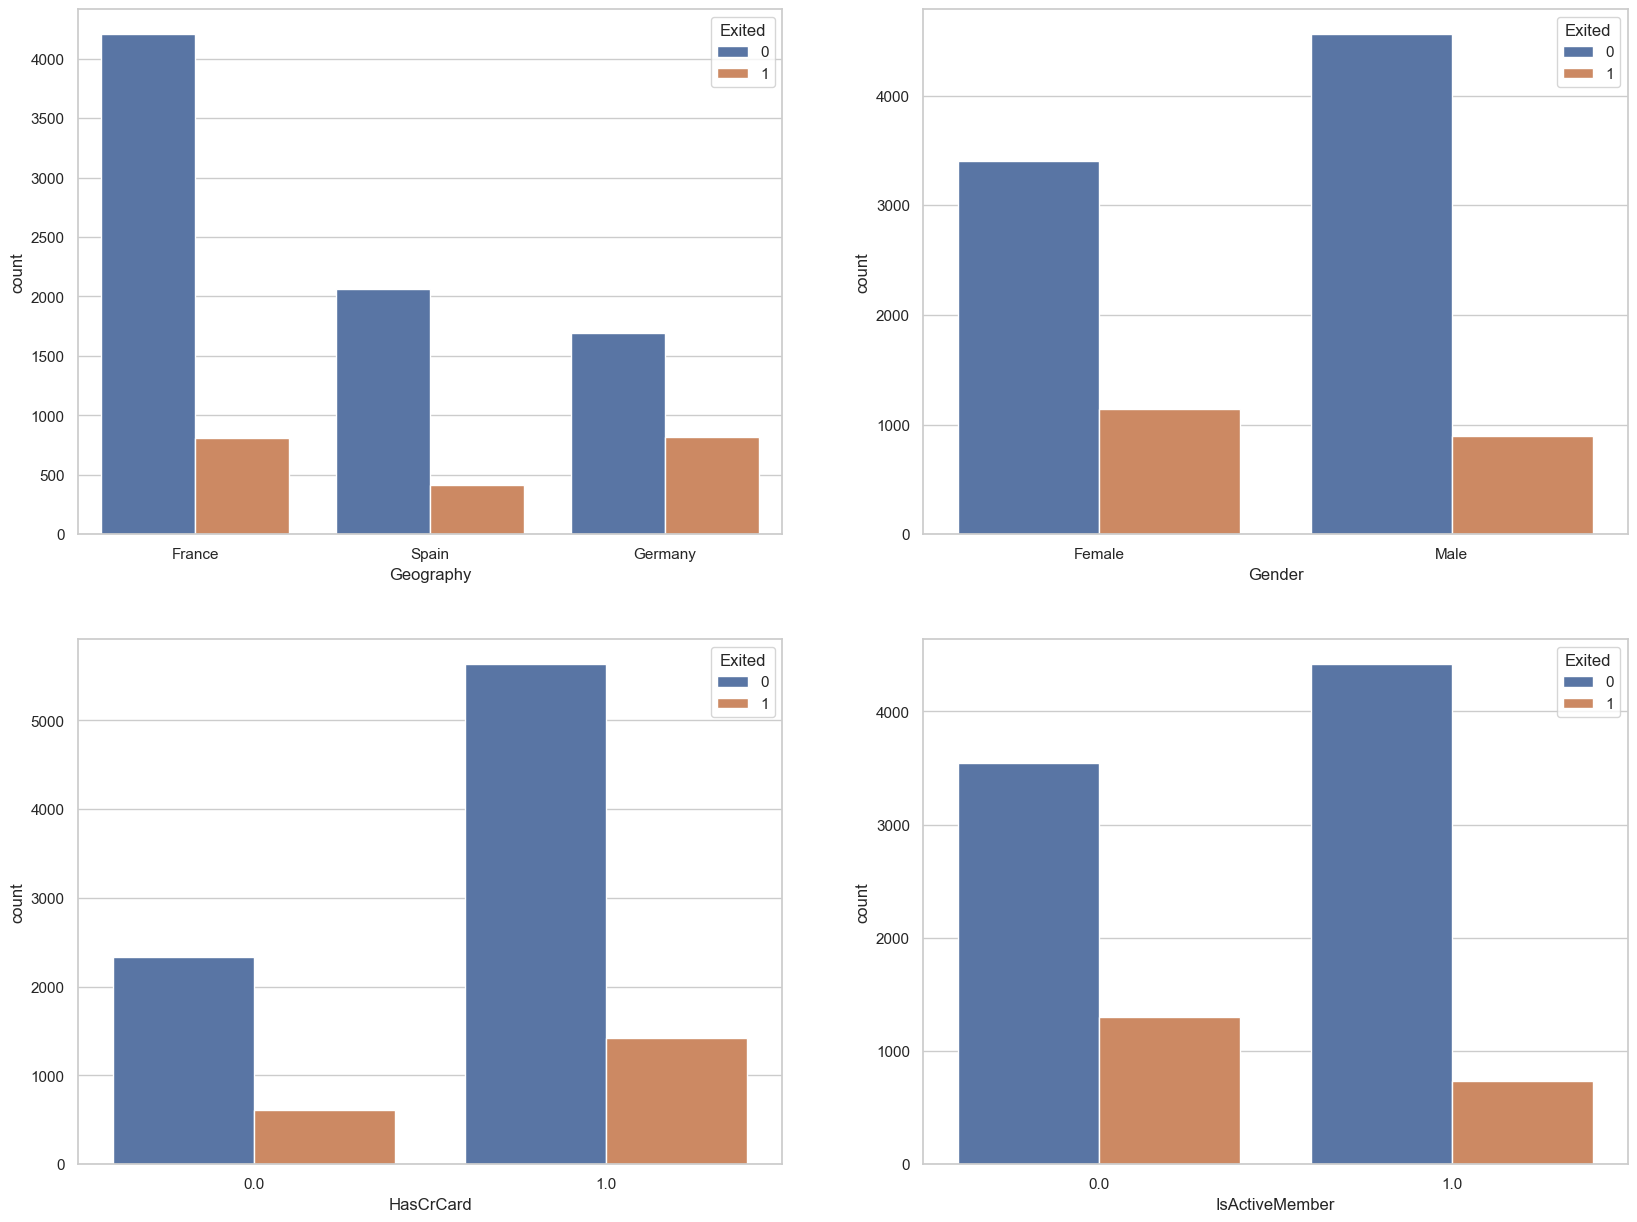

In [ ]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

## Observations
1. Customer from Germany are more likely to leave the bank compared to other countries.

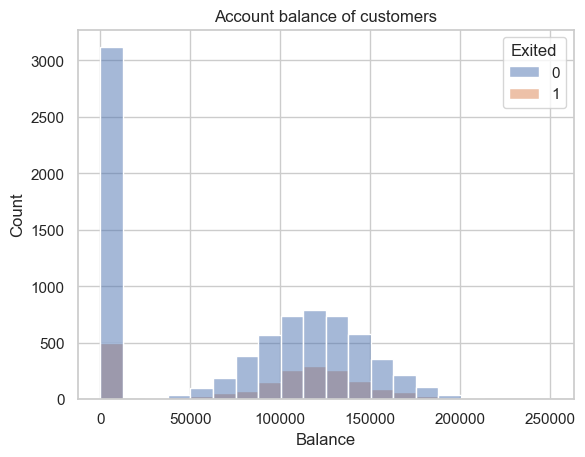

In [ ]:
sns.histplot(df, x = 'Balance', bins = 20, hue = 'Exited')
plt.title('Account balance of customers')
plt.show()

## Observations:



# Boxplot

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

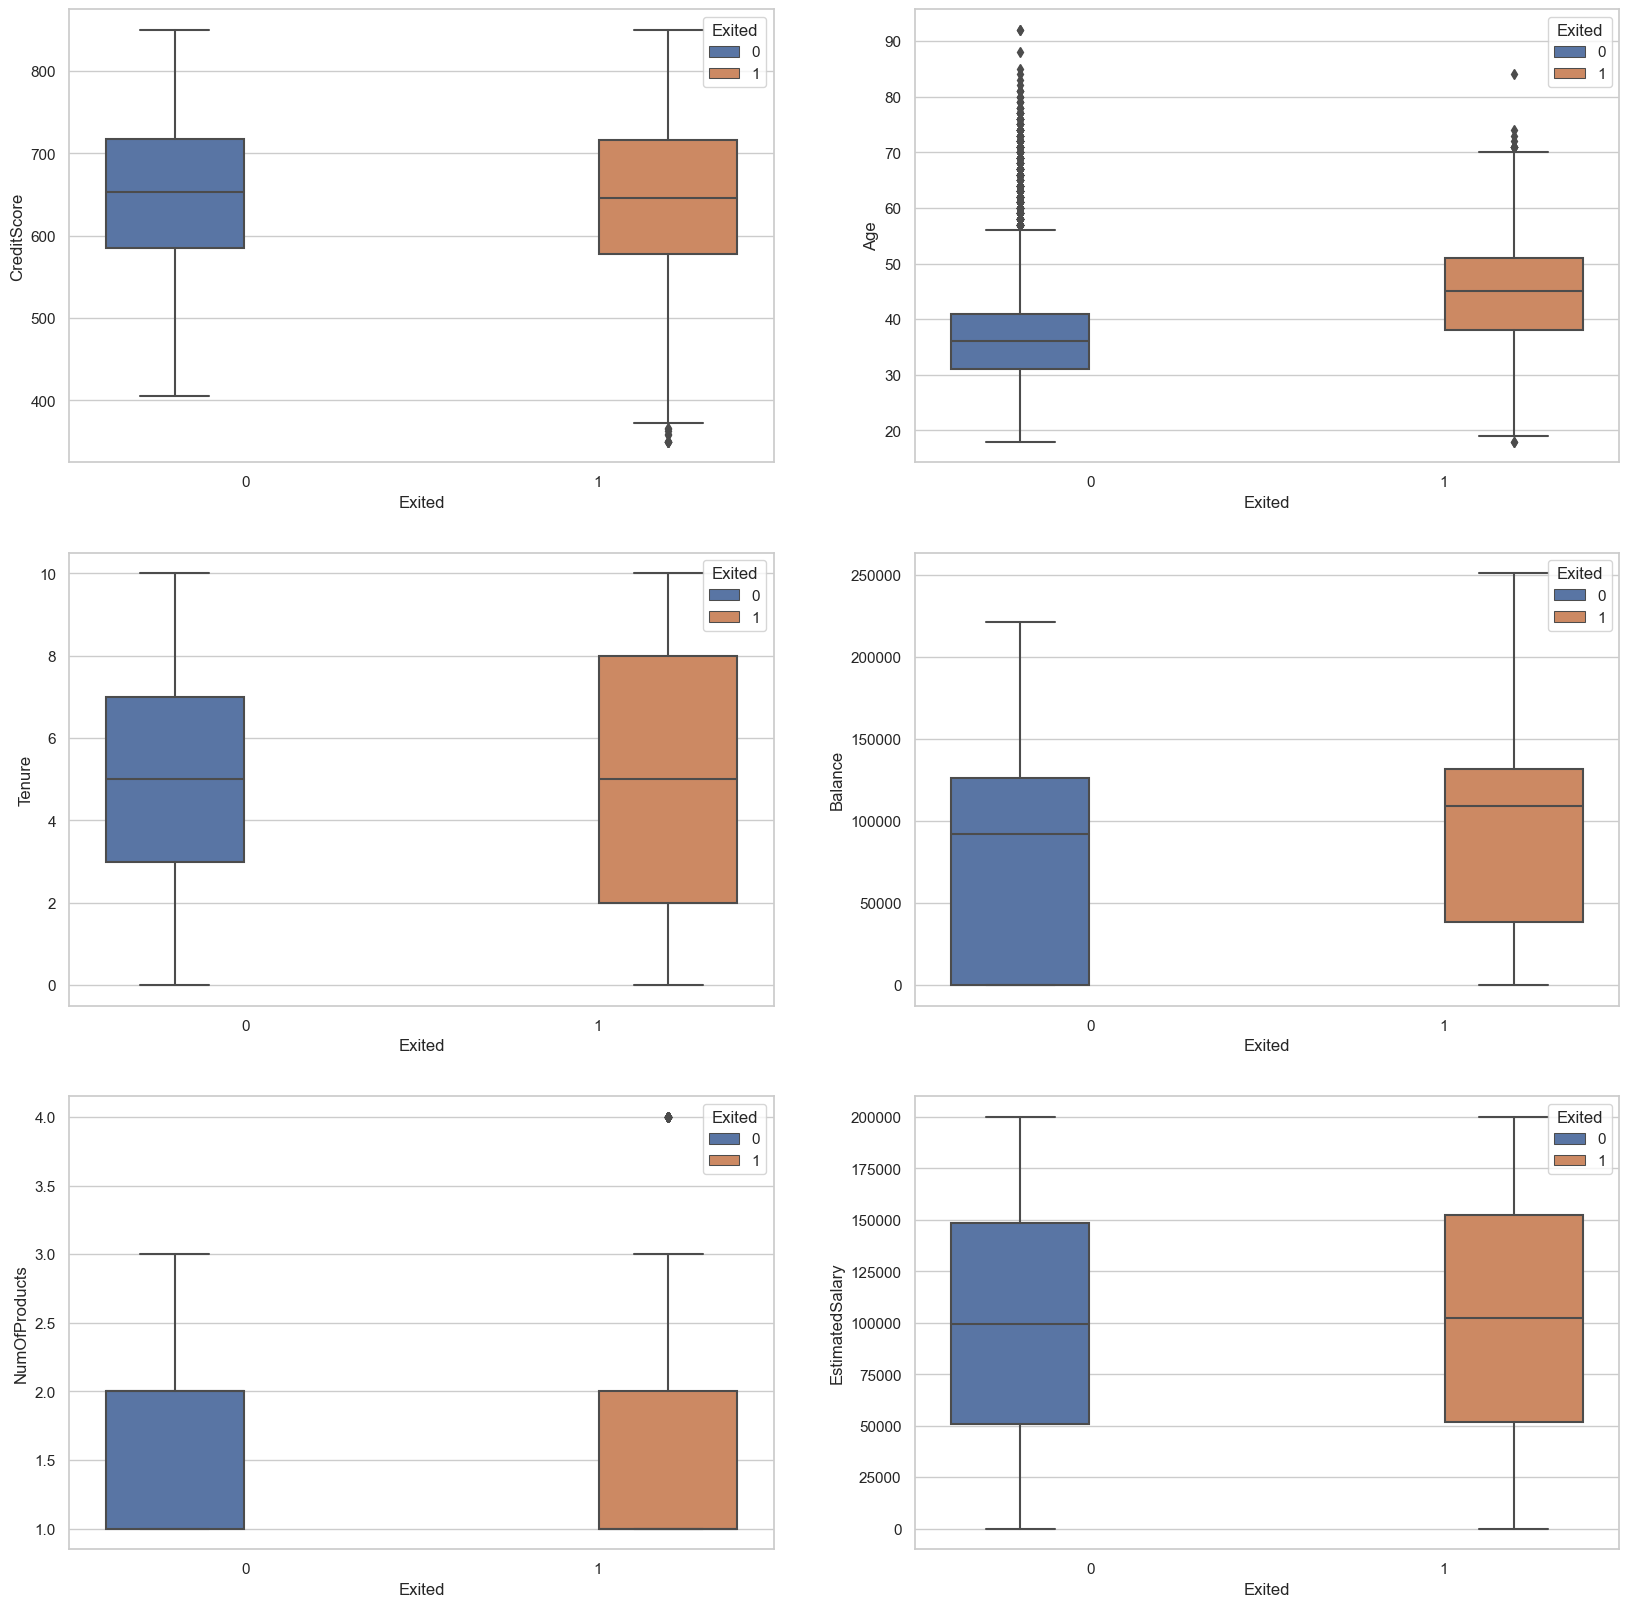

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 20))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

## Observations
1. There is no significant difference in the credit score distribution between retained and churned customers.
2. The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
3. With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
4. Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
5. Neither the product nor the salary has a significant effect on the likelihood to churn

# Lets Look At The People That Exited (or Churned) As  A Whole

- The reason for doing this is that the data the people that churned is small compared to the whole dataset.
- Check the exited people as a whole to see how the distributions and proportions go.

In [ ]:
# Lets see those that left
df_exited = df[df['Exited'] == 1]
df_exited

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
16,653,Germany,Male,58.0,1,132602.88,1,1.0,0.0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9982,655,Germany,Female,46.0,7,137145.12,1,1.0,0.0,115146.40,1
9991,597,France,Female,53.0,4,88381.21,1,1.0,0.0,69384.71,1
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


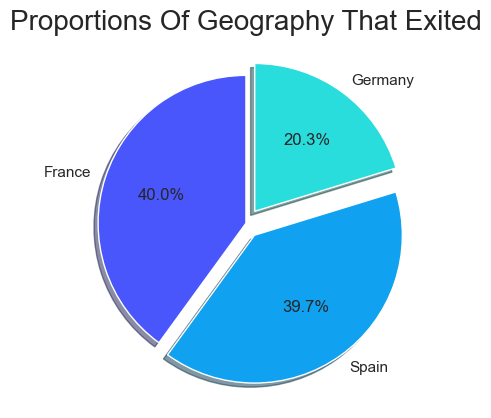

In [ ]:
# To check for the geography

# Lets the pie chart of the proportion
labels = ['France', 'Spain', 'Germany']
explode = (0, 0.1, 0.1)
plt.pie(df_exited["Geography"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportions Of Geography That Exited", size = 20)
plt.show()

# Observations:

- Majority of thse that churned are from France, and the least is Germany.
- About 40.0% of the customers that churned are From france, 39.7% are from spain while 20.3% are from Germany

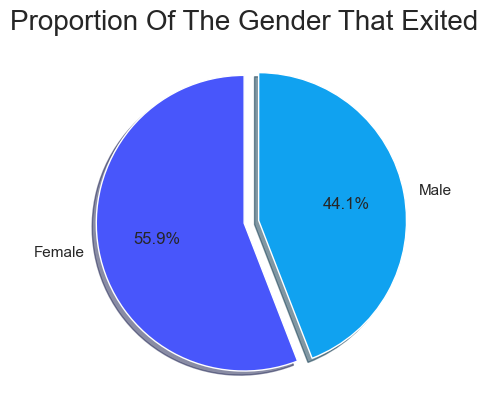

In [ ]:
# Lets the pie chart of the proportion
labels = ['Female', 'Male']
explode = (0, 0.1)
plt.pie(df_exited.Gender.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportion Of The Gender That Exited", size = 20)
plt.show()

# Observation(s)
- Most of the customers that churned are female. About 55.9% are female and 44.1% are male

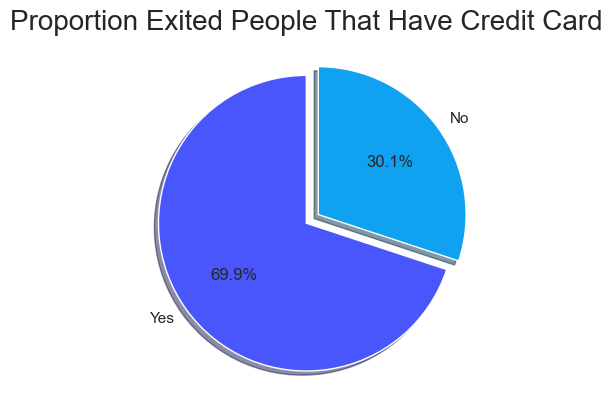

In [ ]:
# Lets the pie chart of the proportion
labels = ['Yes', 'No']
explode = (0, 0.1)
plt.pie(df_exited.HasCrCard.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Proportion Exited People That Have Credit Card", size = 20)
plt.show()

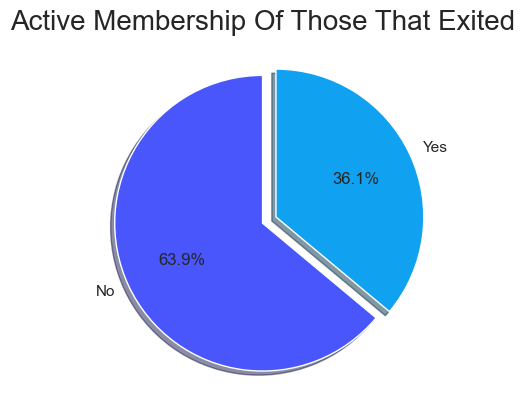

In [ ]:
# Lets the pie chart of the proportion
labels = ['No', 'Yes']
explode = (0, 0.1)
plt.pie(df_exited.IsActiveMember.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = palette)
plt.title("Active Membership Of Those That Exited", size = 20)
plt.show()

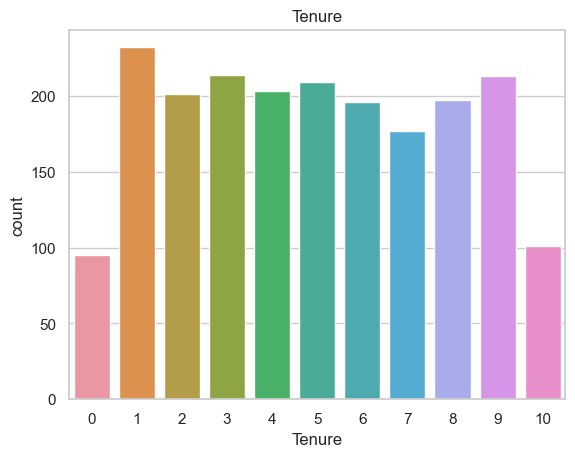

In [ ]:
sns.countplot(data = df_exited, x = 'Tenure')
plt.title("Tenure")
plt.show()

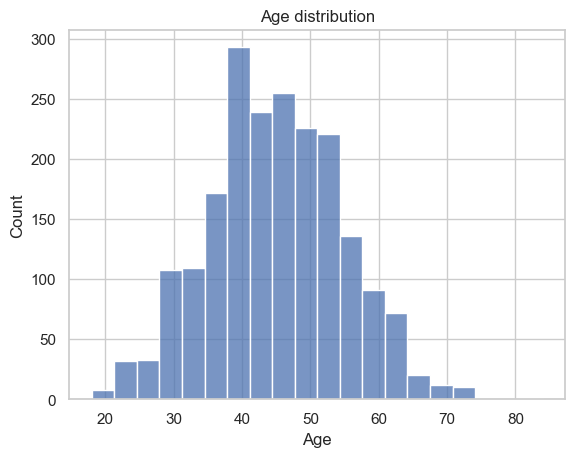

In [ ]:
sns.histplot(data = df_exited, x = 'Age', bins = 20)
plt.title("Age distribution")
plt.show()

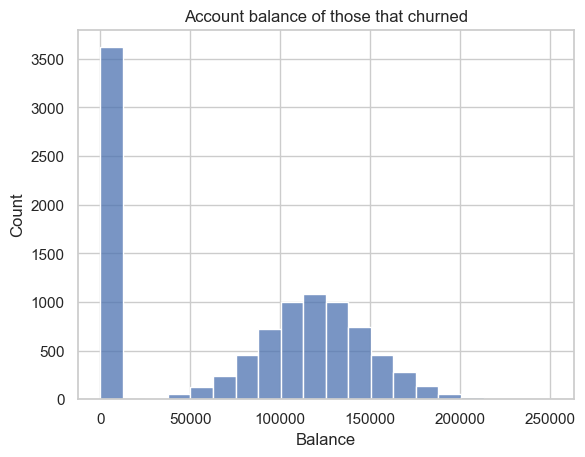

In [ ]:
sns.histplot(data = df, x = 'Balance', bins = 20)
plt.title("Account balance of those that churned")
plt.show()

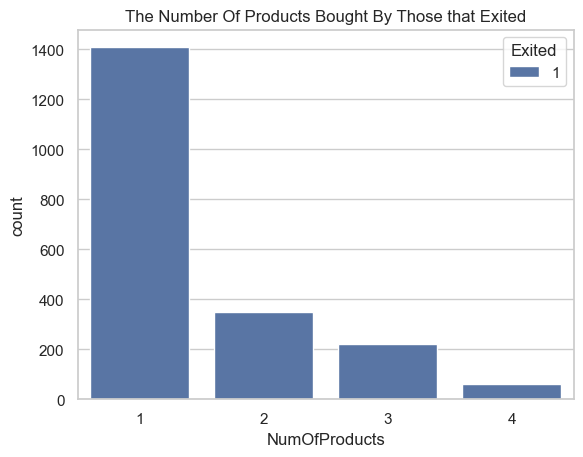

In [ ]:
sns.countplot(data = df_exited, x = 'NumOfProducts', hue = 'Exited')
plt.title("The Number Of Products Bought By Those that Exited")
plt.show()

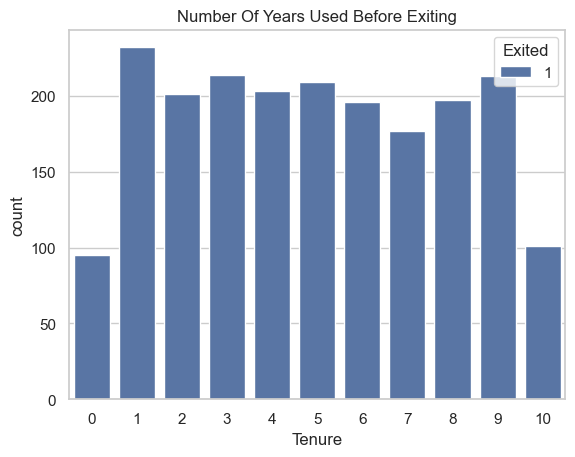

In [ ]:
px.bar(df_exited, x='Tenure', color= 'Exited', title = "Number of each gender", width = 600)

sns.countplot(data = df_exited, x = 'Tenure', hue = 'Exited')
plt.title("Number Of Years Used Before Exiting")
plt.show()

In [ ]:
df_exited

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
16,653,Germany,Male,58.0,1,132602.88,1,1.0,0.0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9982,655,Germany,Female,46.0,7,137145.12,1,1.0,0.0,115146.40,1
9991,597,France,Female,53.0,4,88381.21,1,1.0,0.0,69384.71,1
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


# Bank Customer Churn Prediction.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

### Read dataset

In [2]:
# Import dataset
churn_df = pd.read_csv('/content/Churn_Modelling.csv')
churn_df.head() ## head fuction are showing top 5 rows data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
## check the dataset shape
churn_df.shape

(10002, 14)

In [4]:
## remove the unwanted columns

churn_df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [5]:
# check the columns
churn_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10001 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10001 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10001 non-null  float64
 8   IsActiveMember   10001 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.7+ KB


In [7]:
# Check for missing values
churn_df.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
null_values = ['Geography', 'Age', 'HasCrCard', 'IsActiveMember']
for null in null_values:
    churn_df[null].fillna(churn_df[null].mode()[0], inplace = True)

In [9]:
# checking the duplicated values in data
churn_df.duplicated().sum()

2

In [10]:
# remove the duplicate values
churn_df = churn_df.drop_duplicates()
churn_df.duplicated().sum()

0

In [11]:
# drop rows with null values
churn_df.dropna(inplace=True)

In [12]:
# Summary statistics
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.922903,10.487128,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


### EDA and Visualization

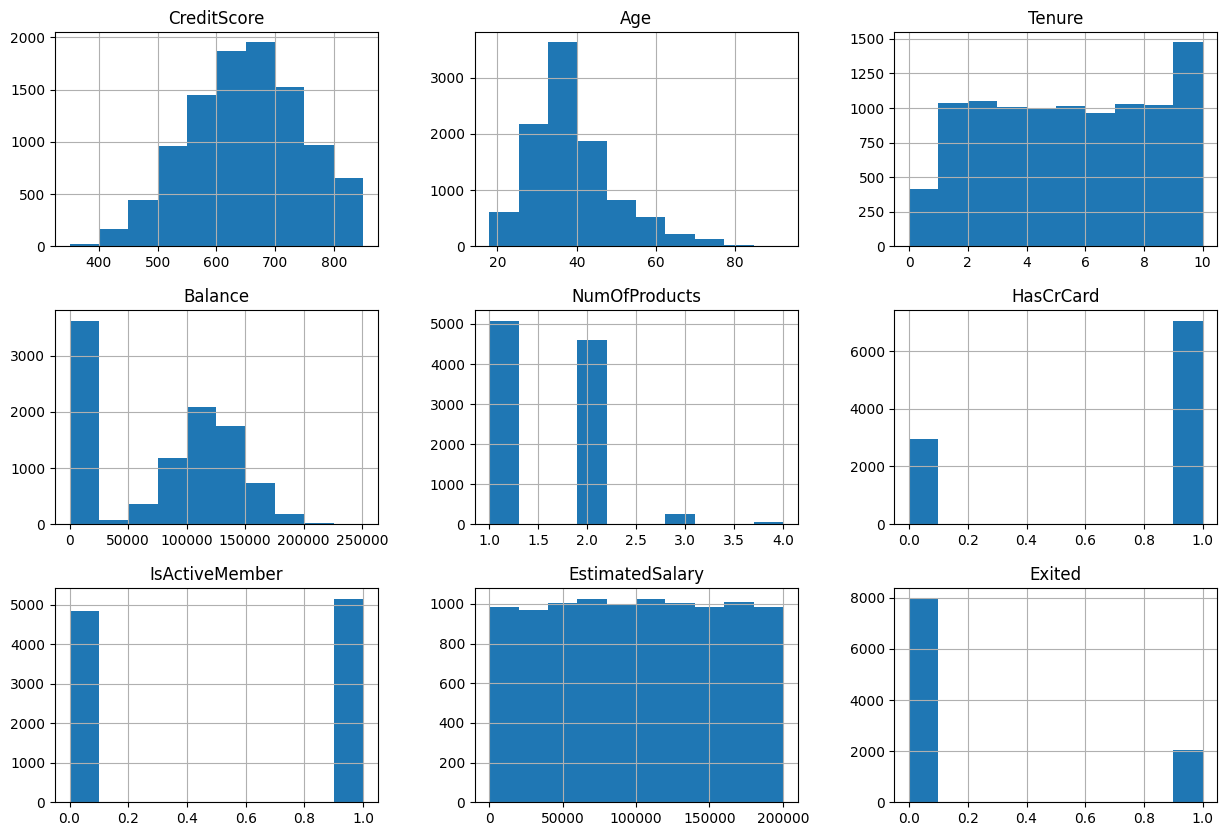

In [13]:
# Plot histogram of numerical values
churn_df.hist(figsize=(15, 10))
plt.show()

0    7963
1    2037
Name: Exited, dtype: int64


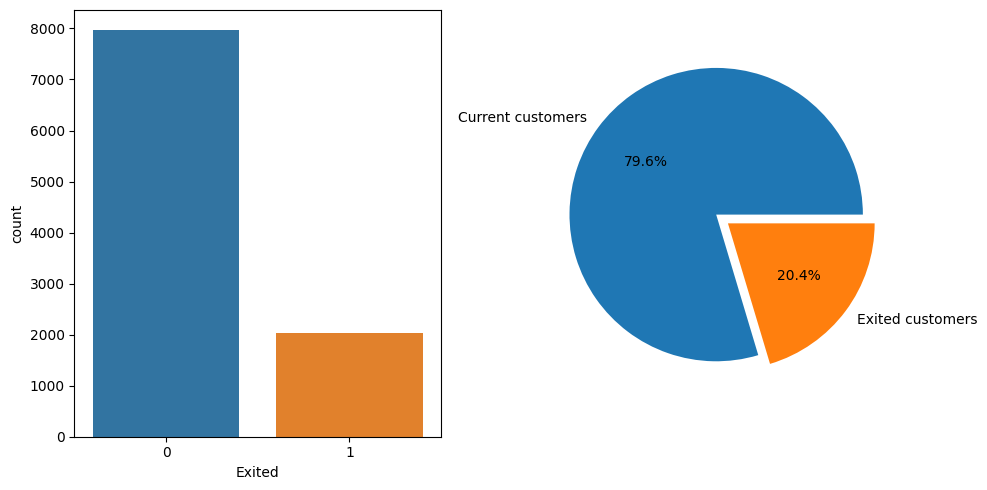

In [14]:
# Analyzing the distribution of target variable
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=churn_df['Exited'])

plt.subplot(1, 2, 2)
explode = [0.1,0.0]
labels = ['Current customers', 'Exited customers']
plt.pie(churn_df['Exited'].value_counts(), explode=explode, labels=labels, autopct='%.01f%%')
print(churn_df['Exited']. value_counts())

plt.tight_layout()
plt.show()

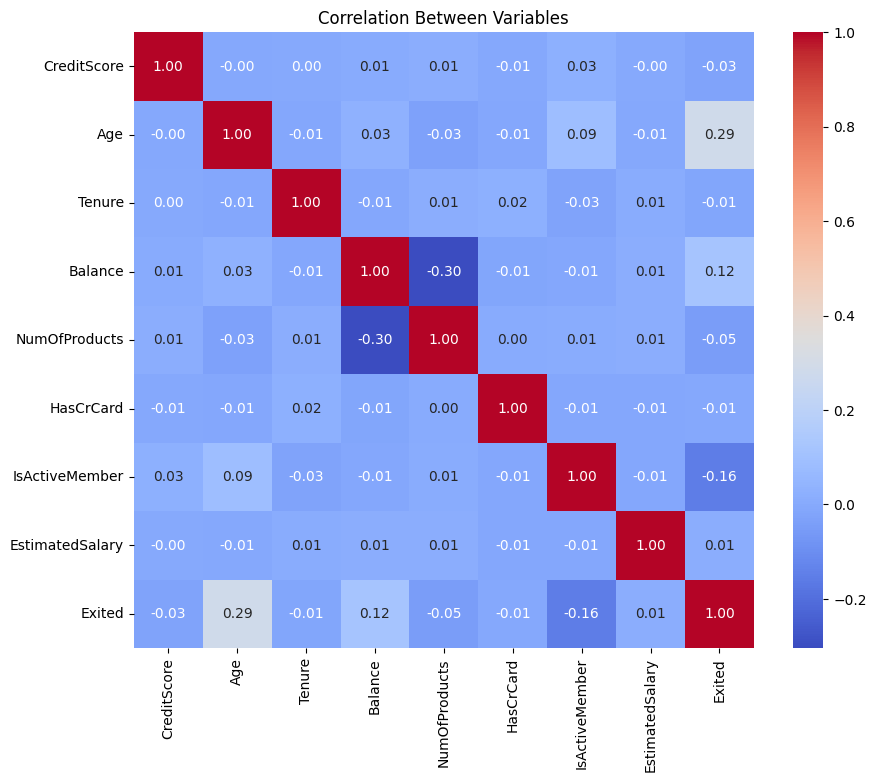

In [15]:
# Correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(churn_df.corr(), cmap='coolwarm', annot=True, fmt = '.2f')
plt.title('Correlation Between Variables')
plt.show();

## Encoding Categorical Data

In [16]:
from sklearn.preprocessing import LabelEncoder
cat_var = ['Geography', 'Gender']

cat_dict = {}
for col in cat_var:
    le = LabelEncoder()
    churn_df[col] = le.fit_transform(churn_df[col])
    col_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    cat_dict[col] = col_mapping

In [17]:
cat_dict

{'Geography': {'France': 0, 'Germany': 1, 'Spain': 2},
 'Gender': {'Female': 0, 'Male': 1}}

In [18]:
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,516,0,1,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,709,0,0,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [19]:
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].astype(int)
churn_df['HasCrCard'] = churn_df['HasCrCard'].astype(int)

## Handling Imbalanced Data using SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance in machine learning. In our dataset, the number of instances in the minority class (`Churned`) is much smaller than the number of instances in the majority class (`Retained`). This can lead to poor performance of machine learning models, as they tend to be biased towards the majority class.

The basic idea behind SMOTE is to create new minority class samples by randomly selecting one or more of the k-nearest neighbors of each minority class sample, and using them to create new synthetic samples.

In [20]:
# Preprocess data
X = churn_df.drop('Exited', axis=1)
y = churn_df['Exited']

In [21]:
# # Oversampling using SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [22]:
y_resampled.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## Splitting the dataset into training and test sets

In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42)

# Scaling numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (12740, 10)
y_train shape: (12740,)
X_test shape: (3186, 10)
y_test shape: (3186,)


## Model Building, Selection and Evaluation:
Model building involves choosing an appropriate machine learning algorithm and evaluating its performance on the dataset. We built different algorithms, such as
- Logistic Regression,
- KNeighbors
- Decision Tree
- Random Forest,
- XGBoost and
- Support Vector Machines,

and compared their metrics.

In [24]:
# Model training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [25]:
# Initialize empty DataFrame to store results
results_df = pd.DataFrame(
    columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC-ROC']
)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results_df = results_df.append(
        {'Model': name,
         'Accuracy': accuracy,
         'F1 Score': f1,
         'Precision': precision,
         'Recall': recall,
         'AUC-ROC': roc_auc}, ignore_index=True
    )
# Print results DataFrame
results_df

,Model,Accuracy,F1 Score,Precision,Recall,AUC-ROC
0,Logistic Regression,0.775267,0.773704,0.759777,0.788152,0.775582
1,K-Nearest Neighbors,0.827684,0.827630,0.807598,0.848680,0.828198
2,Decision Tree,0.818581,0.815806,0.807571,0.824211,0.818719
3,Random Forest,0.871940,0.869063,0.866283,0.871861,0.871938
4,Support Vector Machine,0.846516,0.843018,0.840589,0.845460,0.846490
5,XGBoost,0.905210,0.900788,0.919517,0.882807,0.904662


Based on the results, the **XGBoost model** has the highest scores in all the performance metrics, followed by the **Random Forest model**.

### Hyperparameter tuning for Random Forest model

In [26]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create random forest model and perform grid search
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [27]:
# Print best hyperparameters and corresponding F1 score
print('Best Hyperparameters:', grid_search.best_params_)
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

# Evaluate model using accuracy
rf_model = RandomForestClassifier(random_state=42, **grid_search.best_params_)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
F1 Score: 0.868421052631579
Accuracy: 0.8713119899560577


The reported best hyperparameters are `{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}`, meaning that these values have been found to give the best performance for the model.

The model's performance is better when the `F1 score` and `Accuracy` are higher. In this case, the `F1 score` is 90.8% and the `Accuracy` is 91.2%.

### Hyperparameter tuning for XGBoost model

In [28]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Create XGBoost model and perform grid search
xgb_model = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)

Best Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Accuracy: 0.9002354788069074


### Save the Model

In [29]:
from joblib import dump, load

# Train and save RandomForest Classifier model
X_resampled = scaler.fit_transform(X_resampled)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

dump(rf_model, 'churn_rf_model.joblib')

['churn_rf_model.joblib']

In [30]:
# Load saved  model
rf_model = load('churn_rf_model.joblib')

# Use loaded model to make predictions
y_pred = rf_model.predict(X_test)

In [31]:
import pickle
# Train and save RandomForest Classifier model

dump(rf_model, 'churn_rf_model.joblib')
# Save the XGB model to a file
filename = 'XGB_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))

In [32]:
# Save the RF model to a file
filename = 'RF_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

### Feature Importance

The result of the feature importance can be used to identify which features are most important for predicting customer churn and to prioritize efforts to retain at-risk customers

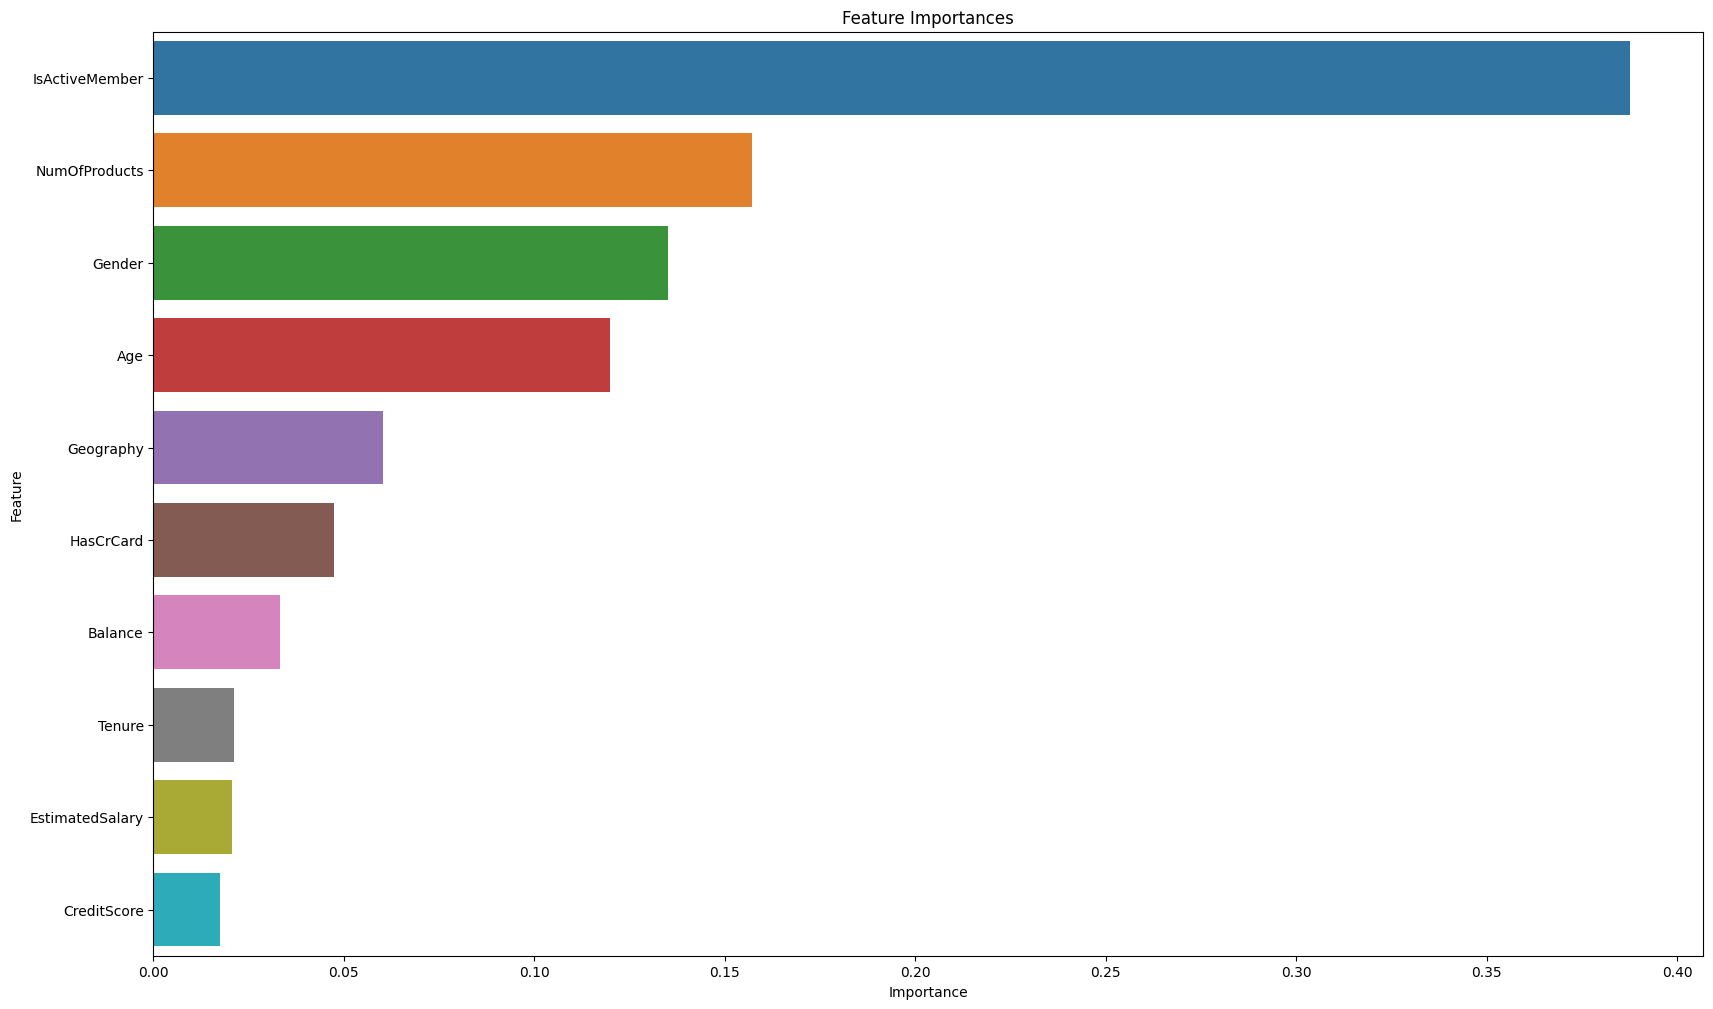

In [33]:
# Train random forest model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature imortances
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Create a barplot of feature importances
plt.figure(figsize=(20, 12))
sns.barplot(x=importances.values, y=importances.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [34]:
importances = importances.sort_values(ascending=False)
importances

IsActiveMember     0.387565
NumOfProducts      0.157111
Gender             0.135009
Age                0.119951
Geography          0.060258
HasCrCard          0.047464
Balance            0.033203
Tenure             0.021214
EstimatedSalary    0.020702
CreditScore        0.017523
dtype: float32

Based on the XGBoost model, the feature importance output shows the relative importance of each feature in predicting customer churn. Here are some interpretations of the feature importance output in relation to the problem statements and goals of the project:

- `IsActiveMember` is the most important feature for predicting customer churn. This suggests that customers who are not active members are more likely to churn.

- `NumOfProducts` and `Gender` are the next two important features for predicting customer churn. This suggests that customers who have a high number of products and are male are slightly more likely to churn.

- `Age` is the fourth most important feature for predicting customer churn. This suggests that older customers are more likely to churn.

- `Geography`, `HasCrCard`, `Balance`, `Tenure`, `EstimatedSalary`, and `CreditScore` are the least important features for predicting customer churn. This suggests that these features have little to no effect on customer churn.


## Encoding Creation

In [35]:
# Create an encoding for the has credict card and the is active column
x = {'HasCrCard': {'Yes': 1, "No" : 0},
'IsActiveMember': {'Yes': 1, "No" : 0}}
x

{'HasCrCard': {'Yes': 1, 'No': 0}, 'IsActiveMember': {'Yes': 1, 'No': 0}}

In [36]:
# Merge the two encodings together
from collections import ChainMap
cat_dict = ChainMap(cat_dict, x)

In [37]:
cat_dict

ChainMap({'Geography': {'France': 0, 'Germany': 1, 'Spain': 2}, 'Gender': {'Female': 0, 'Male': 1}}, {'HasCrCard': {'Yes': 1, 'No': 0}, 'IsActiveMember': {'Yes': 1, 'No': 0}})

In [38]:
# Import the pickle file
import pickle

In [39]:
with open('cat_dict.json', 'wb') as fp: # Save the categorical encodings to aid deployment of the model
     pickle.dump(cat_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
cat_dict

ChainMap({'Geography': {'France': 0, 'Germany': 1, 'Spain': 2}, 'Gender': {'Female': 0, 'Male': 1}}, {'HasCrCard': {'Yes': 1, 'No': 0}, 'IsActiveMember': {'Yes': 1, 'No': 0}})

In [41]:
# Load

with open(r'cat_dict.json', 'rb') as fp:
    f = pickle.load(fp)

In [42]:
f

ChainMap({'Geography': {'France': 0, 'Germany': 1, 'Spain': 2}, 'Gender': {'Female': 0, 'Male': 1}}, {'HasCrCard': {'Yes': 1, 'No': 0}, 'IsActiveMember': {'Yes': 1, 'No': 0}})